In [572]:
import os
import pandas as pd
from pathlib import Path
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, wilcoxon, norm
from statsmodels.stats.power import TTestPower
import seaborn as sns

In [573]:
def load_data(file_name):
    try:
        df = pd.read_csv(file_name, index_col=0)

    except Exception as e:
        print(f"Error with reading file: {e}")
    
    
    scores = df['dice_score'].values

    return df, scores

In [574]:
unet_pilot_df, unet_pilot = load_data("unet_pilot.csv")
unet_pilot_df

,experiment,dice_score
0,Pilot-Study-UNet-11423,78.305295
1,Pilot-Study-UNet-15303,83.394476
2,Pilot-Study-UNet-17439,77.021424
3,Pilot-Study-UNet-18733,77.491948
4,Pilot-Study-UNet-19566,18.843878
5,Pilot-Study-UNet-20289,74.369477
6,Pilot-Study-UNet-21199,71.423864
7,Pilot-Study-UNet-29697,80.924524
8,Pilot-Study-UNet-3262,79.112828
9,Pilot-Study-UNet-35468,79.129313


In [575]:
mcunet_pilot_df, mcunet_pilot = load_data("mcunet_pilot.csv")
mcunet_pilot_df

,experiment,dice_score
0,Pilot-Study-MCUNet-11423,72.693644
1,Pilot-Study-MCUNet-15303,38.611652
2,Pilot-Study-MCUNet-17439,77.818728
3,Pilot-Study-MCUNet-18733,83.896333
4,Pilot-Study-MCUNet-19566,14.688131
5,Pilot-Study-MCUNet-20289,81.915718
6,Pilot-Study-MCUNet-21199,66.467912
7,Pilot-Study-MCUNet-29697,15.965978
8,Pilot-Study-MCUNet-3262,80.934332
9,Pilot-Study-MCUNet-35468,83.702164


In [576]:
def normalityCheck(unet=None, mcunet=None):
    if unet is not None and mcunet is not None:
        print("Normality test on difference between U-Net and MCU-Net")
        value = unet - mcunet 
    elif unet is None:
        print("Normality test on MCU-Net")
        value = mcunet
    else:
        print("Normality test on U-Net")
        value = unet
    shapiro_stat, shapiro_p = shapiro(value)
    print(f"Shapiro Wilk Test: p = {shapiro_p}")
    if shapiro_p < 0.05:
        print("Not normally distributed.")
    else:
        print("Normally distributed.")

    # histogram for checking bell curve
    plt.figure(figsize=(6,4))
    sns.histplot(value, kde=True, bins=10, color='blue')
    plt.title("Distribution")
    plt.xlabel("Value: dice/dice diff")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # qqplot
    sm.qqplot(value, line='45', fit = True)
    plt.title("Q-Q Plot")
    plt.show()
    

Normality test on U-Net
Shapiro Wilk Test: p = 1.0745266568139136e-07
Not normally distributed.


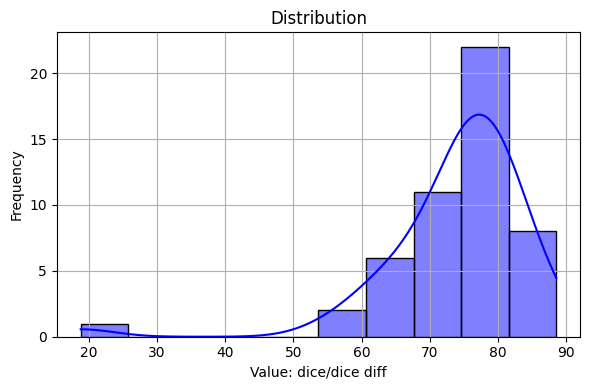

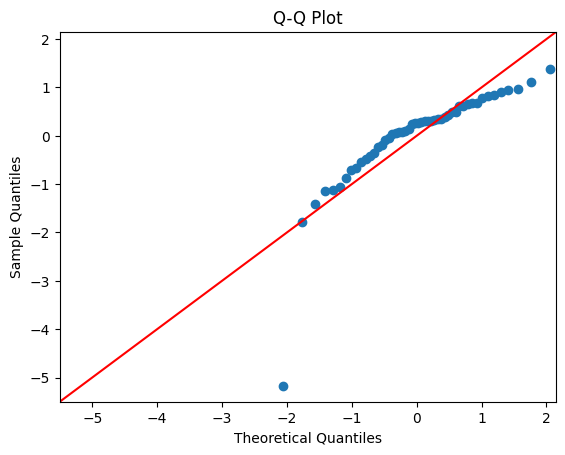

Normality test on MCU-Net
Shapiro Wilk Test: p = 5.256216825542071e-09
Not normally distributed.


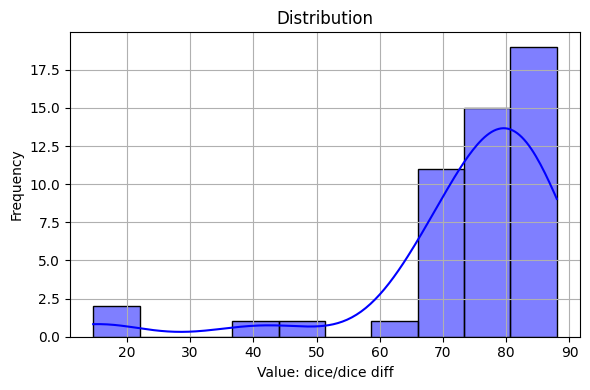

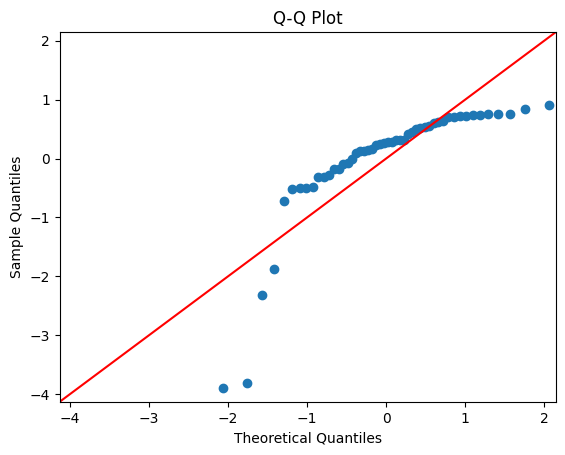

Normality test on difference between U-Net and MCU-Net
Shapiro Wilk Test: p = 3.228802279474795e-06
Not normally distributed.


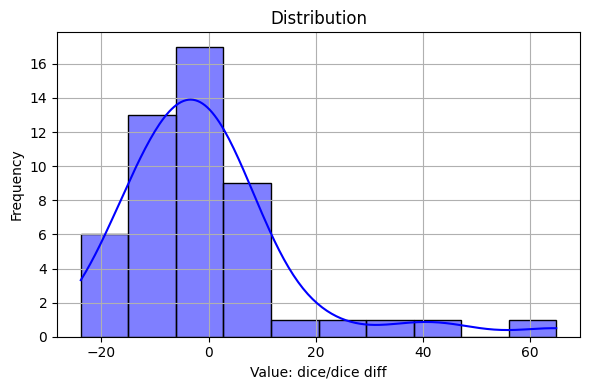

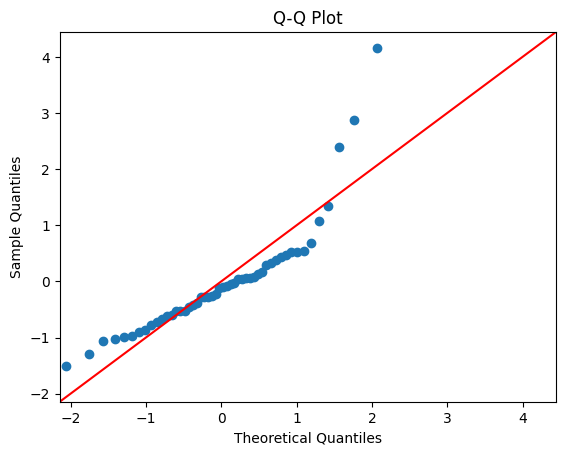

In [577]:
normalityCheck(unet=unet_pilot)
normalityCheck(mcunet=mcunet_pilot)
normalityCheck(unet_pilot, mcunet_pilot)

In [ ]:
def wilcoxon_sample_size_approx(unet, mcunet, alpha=0.05, power=0.8, ARE=0.86, desired_diff = 3):
    
    print(f"Pilot data sample size: {len(unet)}")
    print(f"U-Net mean: {np.mean(unet)}")
    print(f"MCU-Net mean: {np.mean(mcunet)}")
    print(f"Difference (unet - mcunet): {np.mean(unet) - np.mean(mcunet)}")
    print(f"STD of diff: {np.std(unet - mcunet, ddof=1)}")

    # calculating cohens based on desired diff
    diff = unet - mcunet
    std_diff = np.std(diff, ddof=1)
    cohens_d = desired_diff / std_diff
    
    # sample size
    power_analysis = TTestPower()
    n_t_test = power_analysis.solve_power(effect_size=cohens_d, alpha=alpha, power=power, nobs=None, alternative='two-sided')
    
    # adjusting to wilcoxon (ARE: asymptotic relative efficiency)
    n_wilcoxon = int(n_t_test / ARE)
    
    print(f"T test sample size: {n_t_test}")
    print(f"Adjusted Wilcoxon sample size: {n_wilcoxon}")
    print(f"Effect size: {cohens_d}")
    
    return n_wilcoxon, n_t_test, cohens_d


In [579]:
n_wilcoxon, n_t_test, d = wilcoxon_sample_size_approx(unet_pilot, mcunet_pilot)


Pilot data sample size: 50
U-Net mean: 73.82139407800041
MCU-Net mean: 74.11636578152196
Difference (unet - mcunet): -0.2949717035215542
STD of diff: 15.850111111083297
T test sample size: 221.0215356257728
Adjusted Wilcoxon sample size: 257
Effect size: 0.1892731211140993


In [580]:
print("Obtained the sample size. Experiment was conducted accordingly and now we have real data: unet.csv, mcunet.csv")

Obtained the sample size. Experiment was conducted accordingly and now we have real data: unet.csv, mcunet.csv


In [581]:
unet_df, unet = load_data("unet.csv")
mcunet_df, mcunet = load_data("mcunet.csv")

In [582]:
def wilcoxon_signed_rank(unet, mcunet, alpha=0.05):
    
    unet = np.array(unet)
    mcunet = np.array(mcunet)
    
    if len(unet) != len(mcunet):
        print("Not same length, check data")
    
    # basic stats
    print(f"U-Net mean: {np.mean(unet)}, Std: {np.std(unet, ddof=1)}, Median: {np.median(unet)}")
    print(f"MCU-Net mean: {np.mean(mcunet)}, Std: {np.std(mcunet, ddof=1)}, Median: {np.median(mcunet)}")
    
    diff = unet - mcunet
    print("Difference unet- mcunet:")
    print(f"Mean difference: {np.mean(diff)}")
    print(f"Median difference: {np.median(diff)}")
    print(f"Std of differences: {np.std(diff, ddof=1)}")
    print(f"Sample size: {len(diff)}")
    
    # normality check on real data
    shapiro_stat, shapiro_p = shapiro(diff)
    print(f"Shapiro p-value on diff: {shapiro_p}")

    # wilcoxon signed rank
    
    # two sided wanna check better or worse
    print("Wilcoxon signed rank:")
    w, p_value = wilcoxon(unet, mcunet, alternative='two-sided', zero_method='wilcox')
    print(f"W stats: {w}")
    print(f"P value: {p_value}")
    print(f"Significance: {alpha}")

    w_g, p_greater = wilcoxon(unet, mcunet, alternative='greater')
    w_l, p_less = wilcoxon(unet, mcunet, alternative='less')
    
    # one sided
    print(f"P value diff between unet - mcunet is positive: {p_greater}")
    print(f"P value diff between unet - mcunet is negative: {p_less}")
    

In [583]:
wilcoxon_signed_rank(unet, mcunet)

U-Net mean: 73.08698043683354, Std: 14.393763043623313, Median: 76.92724664057651
MCU-Net mean: 74.79037906163637, Std: 14.60673429976762, Median: 78.5968595600447
Difference unet- mcunet:
Mean difference: -1.7033986248028243
Median difference: -1.371263919993325
Std of differences: 19.254483421431136
Sample size: 257
Shapiro p-value on diff: 4.1159470586690273e-17
Wilcoxon signed rank:
W stats: 12712.0
P value: 0.001196113681495679
Significance: 0.05
P value diff between unet - mcunet is positive: 0.9994019431592521
P value diff between unet - mcunet is negative: 0.0005980568407478395


Normality test on difference between U-Net and MCU-Net
Shapiro Wilk Test: p = 4.1159470586690273e-17
Not normally distributed.


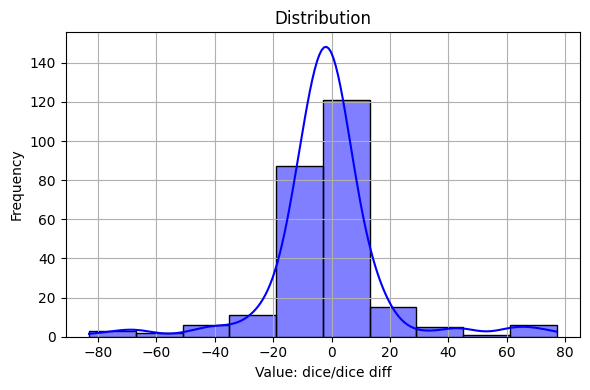

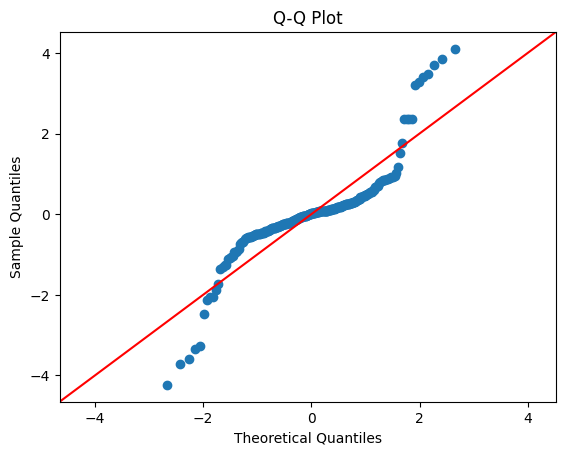

In [584]:
normalityCheck(unet=unet,mcunet=mcunet)